# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import citipy
from citipy import citipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = url + "&appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max_Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind_Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kargasok
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | vila praia de ancora
Processing Record 6 of Set 1 | miramar
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | narsaq
Processing Record 12 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | luoyang
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | sola
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | albany
Processing Record 22

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max_Temp      572
Humidity      572
Cloudiness    572
Wind_Speed    572
Country       572
Date          572
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,kargasok,59.0556,80.8572,2.86,96,97,7.02,RU,1675976540
1,busselton,-33.6500,115.3333,59.09,88,0,7.90,AU,1675976540
2,pevek,69.7008,170.3133,-21.06,94,100,4.65,RU,1675976529
3,avarua,-21.2078,-159.7750,84.25,74,75,10.36,CK,1675976541
4,vila praia de ancora,41.8110,-8.8526,49.50,66,2,4.85,PT,1675976546


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("../Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,kargasok,59.0556,80.8572,2.86,96,97,7.02,RU,1675976540
1,busselton,-33.6500,115.3333,59.09,88,0,7.90,AU,1675976540
2,pevek,69.7008,170.3133,-21.06,94,100,4.65,RU,1675976529
3,avarua,-21.2078,-159.7750,84.25,74,75,10.36,CK,1675976541
4,vila praia de ancora,41.8110,-8.8526,49.50,66,2,4.85,PT,1675976546


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

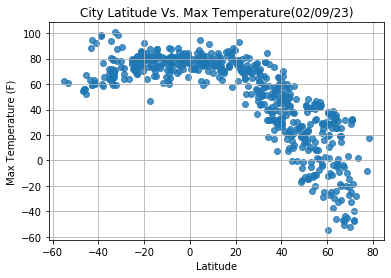

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.Lat, city_data_df.Max_Temp, marker="o",alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

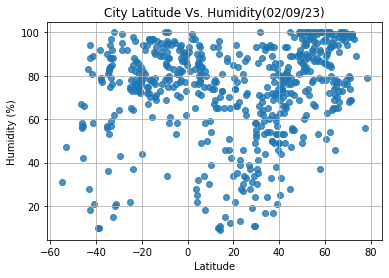

In [43]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.Lat,city_data_df.Humidity,marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

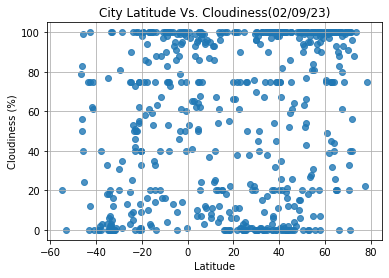

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.Lat,city_data_df.Cloudiness,marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

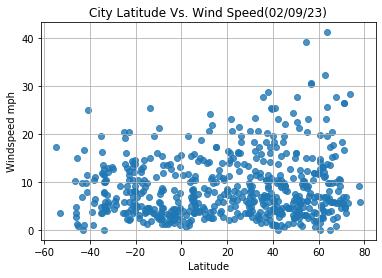

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.Lat,city_data_df.Wind_Speed,marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates)
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"R-squared is: {rvalue}")
    plt.show()

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
0,kargasok,59.0556,80.8572,2.86,96,97,7.02,RU,1675976540
2,pevek,69.7008,170.3133,-21.06,94,100,4.65,RU,1675976529
4,vila praia de ancora,41.8110,-8.8526,49.50,66,2,4.85,PT,1675976546
5,miramar,25.9873,-80.2323,80.62,72,75,18.41,US,1675976546
10,narsaq,60.9167,-46.0500,19.62,96,100,2.48,GL,1675976548


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df.Lat <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
City_ID,,,,,,,,,
1,busselton,-33.6500,115.3333,59.09,88,0,7.90,AU,1675976540
3,avarua,-21.2078,-159.7750,84.25,74,75,10.36,CK,1675976541
6,port alfred,-33.5906,26.8910,68.18,97,100,5.86,ZA,1675976535
7,rikitea,-23.1203,-134.9692,79.68,76,46,20.40,PF,1675976547
8,punta arenas,-53.1500,-70.9167,60.82,47,0,3.44,CL,1675976458


###  Temperature vs. Latitude Linear Regression Plot

R-squared is: -0.8344799066998057


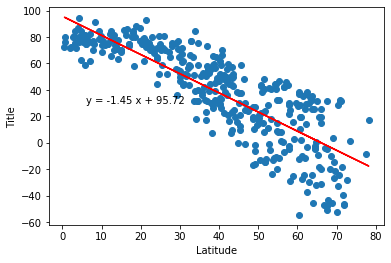

In [52]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max_Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

R-squared is: 0.3474174674555276


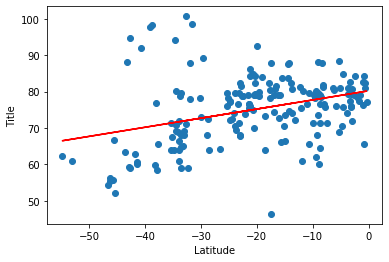

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max_Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The Northern Hemisphere has a strong negative correlation. Meaning, as latitude increases, the max temp decreases
#The Southern Hemisphere has an average positive correlation. Generally, as latitude increases, so does the temperature. 

### Humidity vs. Latitude Linear Regression Plot

R-squared is: 0.3632599947149063


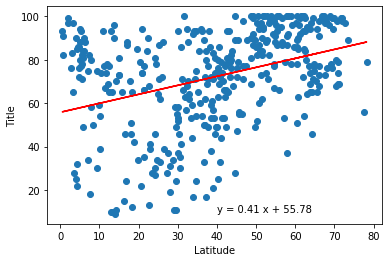

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

R-squared is: 0.39335492947593076


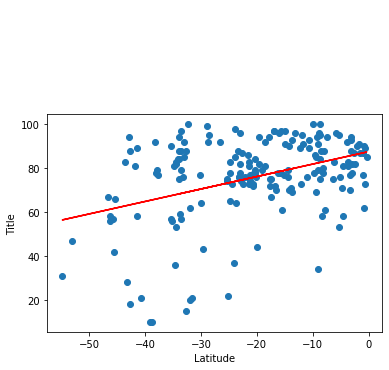

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The Northern Hemisphere has a weak correlation. The latitude and humidity don't seem to have a large effect on each other. 
#The Southern Hemisphere has a weak correlation as well. They don't seem to have a relationship with each other. 

### Cloudiness vs. Latitude Linear Regression Plot

R-squared is: 0.20947862678519047


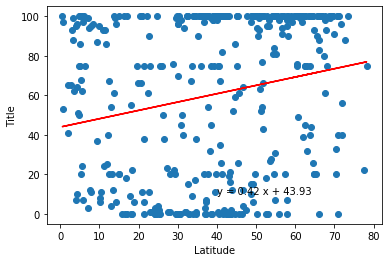

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

R-squared is: 0.414433423956666


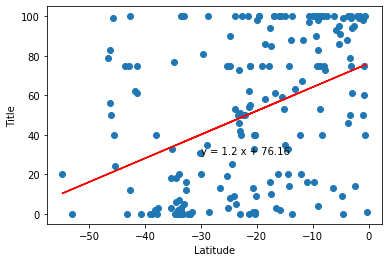

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The Northern Hemisphere has a weak positive correlation. Meaning, as latitude increases, the humidity does increase, but not proportionally. 
#The Southern Hemisphere has a weak positive correlation. Meaning, as latitude increases, the humidity does increase, but not proportionally.  

### Wind Speed vs. Latitude Linear Regression Plot

R-squared is: 0.08278949908366917


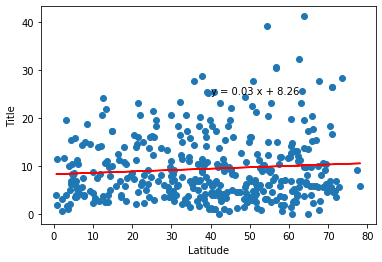

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind_Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

R-squared is: -0.13827522063059344


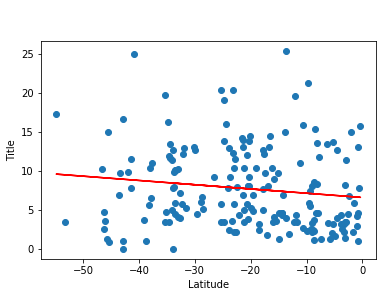

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind_Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The Northern Hemisphere has a weak positive correlation. Meaning, as latitude increases, the windspeed does increase, but not proportionally. 
#The Southern Hemisphere has a weak negative correlation. Meaning, as latitude increases, the windspeed does decrease, but not proportionally.  